# Optional Lab: Linear Regression using Scikit-Learn

There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms that you will work with in this course.



## Goals
## 目标
In this lab you will:
- Utilize  scikit-learn to implement linear regression using a close form solution based on the normal equation

在这个lab中，你将：
- 利用 scikit-learn 实现线性回归。使用基于表达式的闭式解

## Tools
## 工具
You will utilize functions from scikit-learn as well as matplotlib and NumPy. 

你将使用scikit-learn中的函数，以及matplotlib和NumPy

In [1]:
import numpy as np
np.set_printoptions(precision=2)
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
import matplotlib.pyplot as plt
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'; 
plt.style.use('./deeplearning.mplstyle')

<a name="toc_40291_2"></a>
# Linear Regression, closed-form solution
# 线性回归，闭式解
Scikit-learn has the [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) which implements a closed-form linear regression.

Scikit-learn提供了[linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)，实现了闭式解线性回归

Let's use the data from the early labs - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.


让我们使用早期lab中的数据 - 1000sqft，售价为300,000的房子，以及2000sqft，售价为500，000的房子

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


### Load the data set

In [2]:
X_train = np.array([1.0, 2.0])   #features
y_train = np.array([300, 500])   #target value

### Create and fit the model
### 创建并拟合模型
The code below performs regression using scikit-learn. 
The first step creates a regression object.  
The second step utilizes one of the methods associated with the object, `fit`. This performs regression, fitting the parameters to the input data. The toolkit expects a two-dimensional X matrix.

下面的代码使用scikit-learn实现回归
第一步创建回归对象
第二部利用对象的方法`fit`。该方法进行回归，使参数适合输入数据。该方法需要2D的X矩阵输入。

In [4]:
linear_model = LinearRegression()
#X must be a 2-D Matrix
linear_model.fit(X_train.reshape(-1, 1), y_train) 

LinearRegression()

### View Parameters 
### 查看参数
The $\mathbf{w}$ and $\mathbf{b}$ parameters are referred to as 'coefficients' and 'intercept' in scikit-learn.

参数$\mathbf{w}$ 和 $\mathbf{b}$ 在scikit-learn中被称为"coefficients"和"intercept"

In [6]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")
print(f"'manual' prediction: f_wb = wx+b : {1200*w + b}")

w = [200.], b = 100.00
'manual' prediction: f_wb = wx+b : [240100.]


### Make Predictions
### 进行预测

Calling the `predict` function generates predictions.

调用`predict`进行预测

In [8]:
y_pred = linear_model.predict(X_train.reshape(-1, 1))

print("Prediction on training set:", y_pred)

X_test = np.array([[1200]])
print(f"Prediction for 1200 sqft house: ${linear_model.predict(X_test)[0]:0.2f}")

Prediction on training set: [300. 500.]
Prediction for 1200 sqft house: $240100.00


## Second Example
## 第二个例子

The second example is from an earlier lab with multiple features. The final parameter values and predictions are very close to the results from the un-normalized 'long-run' from that lab. That un-normalized run took hours to produce results, while this is nearly instantaneous. The closed-form solution work well on smaller data sets such as these but can be computationally demanding on larger data sets. 
>The closed-form solution does not require normalization.

第二个例子是之前lab中的多元数据。最终取得的参数值和预测值非常接近未标准化的数据经过"长时间运行"的结果。未标准化的运行耗费了几个小时，而闭式解可能只需要一瞬间。闭式解在同样的数据集上可以良好运行，但也可以处理更大的数据集。
>闭式解不需要对数据进行标准化

In [10]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [11]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [12]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [  0.27 -32.62 -67.25  -1.47], b = 220.42


In [14]:
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")

x_house = np.array([1200, 3,1, 40]).reshape(-1,4)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.2f}")

Prediction on training set:
 [295.18 485.98 389.52 492.15]
prediction using w,b:
 [295.18 485.98 389.52 492.15]
Target values 
 [300.  509.8 394.  540. ]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709.09


## Congratulations!
In this lab you:
- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using a close-form solution from that toolkit

# 特征设计与多项式特征
作为一点补充测试，尝试用scikit-learn处理下前面的多项式特征
创建数据

In [16]:
x = np.arange(0, 20, 1)
y = x**2

X = np.c_[x, x**2, x**3]

拟合模型

In [17]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

预测并绘图测试

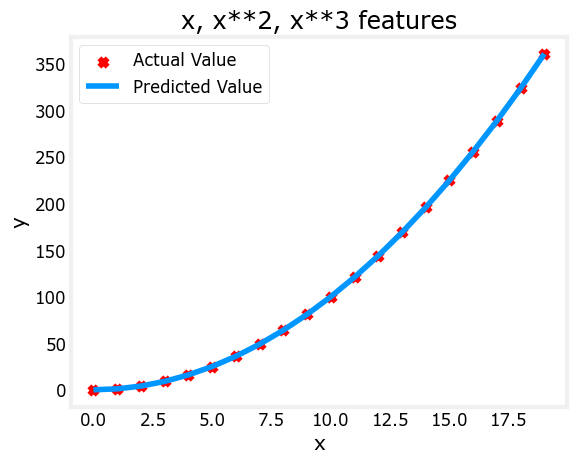

In [18]:
model_w = linear_model.coef_
model_b = linear_model.intercept_
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()